In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import math
from IPython.core.display import display, HTML
from string import Template
import pandas as pd
import json
import random
import pickle

%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\kelihjoll\Anaconda2\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Functions

In [2]:
def islendingur():
    bakgrunnsuppl = input_bakgrunnsuppl()
    tekjur_e_skatt, stadgreidsla, lifeyrisgreidsla, sereignarlifeyrisgr = stadgreidsla_func(bakgrunnsuppl)
    husnaedisstudningur, husn_eignaskerding, husn_tekjuskerding =\
        husnaedisstudningur_func(bakgrunnsuppl)
    if bakgrunnsuppl['hjuskaparstada'] != 1:
        barnabaetur = barnabaetur_func(bakgrunnsuppl)
    else: barnabaetur = 0
    
    if bakgrunnsuppl['tekjur'][0] >= 1678001/12:
        utvarpsgjald = 16800/12
    else: utvarpsgjald = 0
    
    netto = tekjur_e_skatt + husnaedisstudningur + barnabaetur - utvarpsgjald
    
    nidurstodur = {'tekjur': bakgrunnsuppl['tekjur'],\
                   'tekjur_e_skatt': tekjur_e_skatt,\
                   'stadgreidsla': stadgreidsla,\
                   'lifeyrisgreidsla': (lifeyrisgreidsla+sereignarlifeyrisgr),\
                   'husnaedisstudningur': husnaedisstudningur,\
                   'barnabaetur': barnabaetur,\
                   'utvarpsgjald': utvarpsgjald,\
                   'pjeng_i_vasa': netto}
    
    return nidurstodur, bakgrunnsuppl

In [3]:
def input_bakgrunnsuppl():
    # HJÚSKAPARSTAÐA
    # =======================================================
    hjuskaparstada = 4
    while hjuskaparstada >3 or hjuskaparstada <1:
        hjuskaparstada = int(raw_input('1: einhleypur, 2: einst. foreldri, 3: giftur/sambud '))
    
    # BÚSETUFORM
    # =======================================================
    print "Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?"
    husn = 4
    while husn >3 or husn <1:
        husn = int(raw_input('1: eigin, 2: leigu, 3: hvorugt '))
    
    # TEKJUR OG IÐGJALD
    # =======================================================
    laun_a_manudi = int(raw_input("Laun fyrir skatt: "))
    fjarmagnstekjur = int(raw_input("Fjarmagnstekjur: "))
    
    print "	Iðgjald í lífeyrissjóð?"
    idgjald = 3
    while idgjald >2 or idgjald <1:
        idgjald = int(raw_input('1: 0%, 2: 4% '))
    if idgjald == 1:
        idgjald = 0.0
    elif idgjald == 2:
        idgjald = 0.04
            
    print "	Iðgjald í séreign?"
    sereignaridgjald = 5
    while sereignaridgjald >4 or sereignaridgjald <0:
        sereignaridgjald = int(raw_input('0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% '))
    sereignaridgjald = sereignaridgjald / 100.0
    
    if hjuskaparstada == 3:
        laun_maka = int(raw_input("Laun maka fyrir skatt: "))
        fjarmagnstekjur_maka = int(raw_input("Fjarmagnstekjur maka: "))
    else:
        laun_maka = 0
        fjarmagnstekjur_maka = 0
    tekju_uppl = [laun_a_manudi, fjarmagnstekjur, laun_maka, fjarmagnstekjur_maka]
    
    # EIGNIR
    # =======================================================
    if hjuskaparstada == 3:
        print "Allar eignir (samanlagðar eignir hjóna) að frádregnum öllum skuldum."
        print "Með eignum skal telja hlutabréf, innstæður og verðbréf: "
    else:
        print "Allar eignir að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: "
    eignir = int(raw_input())
    
    # HÚSNÆÐISBREYTUR
    # =======================================================
    if husn == 1:   
        print 'Eftirstöðvar í árslok af lánum sem tekin hafa verið til öflunar íbúðarhúsnæðis til eigin nota: '
        eftirstodvar = int(raw_input())
        print "Vextir og verðbætur af íbúðarlánum á ársgrundvelli, þ.m.t. dráttarvextir og lántökukostnaður: "
        vaxtagjold = int(raw_input())
    else:
        eftirstodvar = 0
        vaxtagjold = 0
    if husn == 2:
        fjoldi_heimilismanna = int(raw_input("fjoldi heimilismanna ad ther medtoldum: "))
        if fjoldi_heimilismanna > 4:
            fjoldi_heimilismanna = 4
        if fjoldi_heimilismanna == 1:
            heimilistekjur = (tekju_uppl[0] + tekju_uppl[1])
            heimiliseignir = eignir
        elif fjoldi_heimilismanna == 2 and hjuskaparstada == 3:
            heimilistekjur = sum(tekju_uppl)
            heimiliseignir = eignir
        else:
            heimilistekjur = int(raw_input('samanlagdar manadartekjur allra heimilismanna: '))
            heimiliseignir = int(raw_input('samanlagdar eignir allra heimilismanna: '))
        husnaediskostnadur = int(raw_input('manadarlegur husnaediskostnadur: '))
    else: 
        fjoldi_heimilismanna = 0
        heimilistekjur = 0
        heimiliseignir = 0
        husnaediskostnadur = 0
        
    # BÖRN
    # =======================================================
    if hjuskaparstada != 1:    
        print "Fjöldi barna á heimli: "
        fj_barna = int(raw_input())
        if fj_barna != 0:
            print " - þar af yngri en 7 ára: "
            fj_barna_undir_7 = fj_barna + 1
            while fj_barna_undir_7 > fj_barna:
                fj_barna_undir_7 = int(raw_input())
        elif fj_barna == 0:
            fj_barna_undir_7 = 0
        if fj_barna > 3:
            fj_barna = 3
    else:
        fj_barna, fj_barna_undir_7 = 0
        
    # ÖRORKA
    # =======================================================
    aldur = -1
    while aldur <= 0:
        aldur = int(raw_input("Aldur?"))
    
    if aldur < 67:
        print "Hlutfall örorku?"
        ororkuhlutfall = int(raw_input("Hlutfall i prosentum: "))
        if ororkuhlutfall != 0:
            if ororkuhlutfall >= 75:
                print "Fyrsta 75% örorkumat?"
                fyrsta_75_mat = int(raw_input("Aldur vid fyrsta mat: "))
            else:
                fyrsta_75_mat = 0
            print "Býrðu einn?"
            byr_einn = 2
            while byr_einn <0 or byr_einn >1:
                byr_einn = int(raw_input("0: by ein/n, 1: by ekki ein/n: "))
            print "Hreyfihömlunarmat?"
            hreyfihomlun = 3
            while hreyfihomlun <0 or hreyfihomlun >2:
                hreyfihomlun = int(raw_input("0: Nei, 1: Ja, bensinstyrkur fra TR, 2: Ja, uppbot v/reksturs bifreidar fra TR"))
            if fj_barna >0:
                medlag_fj = 100
                while medlag_fj > fj_barna:
                    medlag_fj = int(raw_input("Fjoldi barna sem medlag faest greitt med fra TR: "))

    else:
        ororkuhlutfall, fyrsta_75_mat, byr_einn, hreyfihomlun, medlag_fj = 0
    
    # ELLILÍFEYRIR
    # =======================================================
    if aldur >= 67:
        print "Býrðu einn?"
        byr_einn = 2
        while byr_einn <0 or byr_einn >1:
            byr_einn = int(raw_input("0: by ein/n, 1: by ekki ein/n: "))
        print "Hreyfihömlunarmat?"
        hreyfihomlun = 3
        while hreyfihomlun <0 or hreyfihomlun >2:
            hreyfihomlun = int(raw_input("0: Nei, 1: Ja, bensinstyrkur fra TR, 2: Ja, uppbot v/reksturs bifreidar fra TR"))
    
    
    
    # =======================================================
    
    bakgrunnsuppl = {'hjuskaparstada': hjuskaparstada,\
                    'busetuform': husn,\
                    'tekjur': tekju_uppl,\
                    'eignir': eignir,\
                    'husnaedislan': eftirstodvar,\
                    'vaxtagjold': vaxtagjold,\
                    'husnaediskostnadur': husnaediskostnadur,\
                    'fjoldi_heimilismanna': fjoldi_heimilismanna,\
                    'heimilistekjur': heimilistekjur,\
                    'heimiliseignir': heimiliseignir,\
                    'fjoldi_barna': fj_barna,\
                    'fjoldi_barna_undir_7': fj_barna_undir_7,\
                    'idgjald': idgjald,\
                    'sereignaridgjald': sereignaridgjald,
                    'ororkuhlutfall': ororkuhlutfall,
                    'fyrsta_75_mat': fyrsta_75_mat,
                    'byr_einn': byr_einn,
                    'hreyfihomlun': hreyfihomlun,
                    'medlag_fj': medlag_fj
                    }
    
    return bakgrunnsuppl

In [4]:
def stadgreidsla_func(info):
    
    skattthrep = 834707
    skatthlutfall_nedra = 0.3694
    skatthlutfall_efra = 0.4624
    personuafsl = 52907
    
    lifeyrir = (info['tekjur'][0] * info['idgjald'])
    serlifeyrir = (info['tekjur'][0] * info['sereignaridgjald'])
    
    stofn = info['tekjur'][0] - lifeyrir - serlifeyrir
    
    if stofn <= skattthrep:
        skattstofn_1 = stofn
        skattstofn_2 = 0
    else:
        skattstofn_1 = skattthrep
        skattstofn_2 = stofn - skattthrep
        
    skattur_nedra_threp = (skattstofn_1*skatthlutfall_nedra)
    skattur_efra_threp = (skattstofn_2*skatthlutfall_efra)
    
    reiknud_stadgreidsla = skattur_nedra_threp + skattur_efra_threp
    stadgreidsla_alls = reiknud_stadgreidsla - personuafsl
    
    laun_e_skatt = stofn - stadgreidsla_alls
    
    return laun_e_skatt, stadgreidsla_alls, lifeyrir, serlifeyrir        

In [5]:
def husnaedisstudningur_func(info):

    if info['busetuform'] == 1:      
        studningur = vaxtabaetur_func(info)
        
    elif info['busetuform'] == 2:
        studningur = husnaedisbaetur_func(info)
        
    else:
        studningur = 0
    
    return studningur

In [6]:
def vaxtabaetur_func(info):
    
    hamark_vaxtagjalda = [800000, 1000000, 1200000] #fyrir: [einstakling, einstætt foreldri, hjón]
    hamark_bota = [400000, 500000, 600000] #fyrir: [einstakling, einstætt foreldri, hjón]
    tekjur_yearly = [info['tekjur'][0]*12,\
                     info['tekjur'][1]*12,\
                     info['tekjur'][2]*12,\
                     info['tekjur'][3]*12]
    
    eignaskerdingarmork_nedri = [4500000.0, 4500000.0, 7300000.0] #fyrir: [einstakling, einstætt foreldri, hjón]
    eignaskerdingarmork_efri = [7200000.0, 7200000.0, 11680000.0] #fyrir: [einstakling, einstætt foreldri, hjón]

    stofn_list = [hamark_vaxtagjalda[info['hjuskaparstada']-1], 
                  0.07*info['husnaedislan'], 
                  info['vaxtagjold']]
    stofn =  min(float(s) for s in stofn_list)
    
    tekjuskerding = (0.085 * sum(tekjur_yearly))
    baetur = stofn - tekjuskerding
    if baetur < 0:
        baetur = 0
    
    if info['eignir'] >= eignaskerdingarmork_efri[info['hjuskaparstada']-1]:
        eignaskerding = baetur
        baetur = 0
        
    elif info['eignir'] >= eignaskerdingarmork_nedri[info['hjuskaparstada']-1]:
        eignaskerding =\
            baetur *\
            ((info['eignir'] - eignaskerdingarmork_nedri[info['hjuskaparstada']-1]) /
            (eignaskerdingarmork_efri[info['hjuskaparstada']-1] - 
             eignaskerdingarmork_nedri[info['hjuskaparstada']-1]))
        baetur -= eignaskerding
    
    else:
        eignaskerding = 0
            
    if baetur > hamark_bota[info['hjuskaparstada']-1]:
        baetur = hamark_bota[info['hjuskaparstada']-1]

    if info['hjuskaparstada'] == 3:
        baetur = baetur/24 #bætur deilast jafnt milli hjóna
    else:
        baetur = baetur/12
    tekjuskerding = tekjuskerding/12
    eignaskerding = (eignaskerding/12)
    
    if baetur < 0:
        baetur = 0
    if tekjuskerding < 0:
        tekjuskerding = 0
    if eignaskerding < 0:
        eignaskerding = 0
            
    return baetur, tekjuskerding, eignaskerding

In [7]:
def husnaedisbaetur_func(info):

    grunnfjarhaedir = [372000/12, 492000/12, 576000/12, 624000/12]
    fritekjumark = [3373000/12, 4461064/12, 5222710/12, 5657936/12]
    eignaskerdingarmork_nedri = 6500000.0
    eignaskerdingarmork_efri = 10400000.0
    
    stofn = grunnfjarhaedir[(info['fjoldi_heimilismanna']-1)]
    
    if info['heimilistekjur'] <= fritekjumark[info['fjoldi_heimilismanna']-1]:
        baetur = stofn
        tekjuskerding = 0
    else:
        tekjuskerding = 0.09 *\
        (info['heimilistekjur'] - fritekjumark[info['fjoldi_heimilismanna']-1])
        baetur = stofn - tekjuskerding
    
    if info['heimiliseignir'] >= eignaskerdingarmork_efri:
        eignaskerding = baetur
        baetur = 0
    elif info['heimiliseignir'] >= eignaskerdingarmork_nedri:
        eignaskerding = baetur *\
            ((info['heimiliseignir'] - eignaskerdingarmork_nedri) /
             (eignaskerdingarmork_efri - eignaskerdingarmork_nedri))
        baetur -= eignaskerding
    else:
        eignaskerding = 0
    
    if baetur > 0.75*info['husnaediskostnadur']:
        baetur = 0.75*info['husnaediskostnadur']
    if baetur < 0:
        baetur = 0
    if tekjuskerding < 0:
        tekjuskerding = 0
    if eignaskerding < 0:
        eignaskerding = 0
            
    return baetur, tekjuskerding, eignaskerding

In [8]:
def barnabaetur_func(info):
    tekjur_yearly = [info['tekjur'][0]*12, 
                     info['tekjur'][1]*12, 
                     info['tekjur'][2]*12, 
                     info['tekjur'][3]*12]
    
    fj_barna = info['fjoldi_barna']
    fj_barna_undir_7 = info['fjoldi_barna_undir_7']
    
    # SKERÐINGARHLUFÖLL
    skerdingarhlutfoll = [0.04, 0.06, 0.08] # [1 barn, 2 börn, 3 börn eða fleiri]
    skerdingarhlutf_vidbot = 0.04
    
    # FJÁRHÆÐIR 2017
    fjarhaedir_fyrsta_barn = [342939, 205834] # [einstætt foreldri, hjón/sambúðarfólk]
    fjarhaedir_umfram_born = [351787, 245087] # [einstætt foreldri, hjón/sambúðarfólk]
    vidbotarfjarhaed_hvert_barn_undir_7 = 122879
    
    # SKERÐINGARMÖRK
    skerdingarmork = [2700000, 5400000] # [einstætt foreldri, hjón/sambúðarfólk]
    
    # ÚTREIKNINGUR ÓSKERTRAR BÓTAFJÁRHÆÐAR
    stofn_til_skerdingar = sum(tekjur_yearly) - skerdingarmork[info['hjuskaparstada']-2]
    if stofn_til_skerdingar < 0:
        stofn_til_skerdingar = 0
        
    almennar_barnabaetur =\
        fjarhaedir_fyrsta_barn[info['hjuskaparstada']-2] +\
        ((fj_barna-1) * fjarhaedir_umfram_born[info['hjuskaparstada']-2]) 
        
    vidbotarbaetur = (fj_barna_undir_7 * vidbotarfjarhaed_hvert_barn_undir_7)
        
    skerding = (skerdingarhlutfoll[fj_barna-1] * stofn_til_skerdingar)
    if skerding > almennar_barnabaetur:
        skerding = almennar_barnabaetur
    skerding_vidbotar = ((fj_barna_undir_7*skerdingarhlutf_vidbot) * stofn_til_skerdingar)
    if skerding_vidbotar > vidbotarbaetur:
        skerding_vidbotar = vidbotarbaetur
    
    baetur = almennar_barnabaetur + vidbotarbaetur - (skerding + skerding_vidbotar)
    if baetur < 0:
        baetur = 0
    
    if info['hjuskaparstada'] == 2:
        return baetur/12
    else:
        return baetur/24 #bætur deilast jafnt milli hjóna


In [263]:
def ororka_func(info):
    """
    Til einfoldunar er gert rad fyrir ad:
        busetuhlutfall = 100%
        hlutfall skattkorts hjá TR = 0%
        greiðslur frá lífeyrissjóðum = 0
        greiðslur úr séreignarsjóðum = 0
        aðrar tekjur = 0 (aðrar tekjur eiga að bætast við launatekjur í útreikningum)
        skattskyldar bætur sveitarfélaga = 0
        afborganir krafna hjá TR = 0
        erlendur grunnlifeyrir = 0
        n.b. aðrar tekjur innihalda ekki fjármagnstekjur
    """
    grunnlifeyrir = 42852.0
    nedri_skerdingarmork_lifeyris = 214602.0
    efri_skerdingarmork_lifeyris = 386010.0
    fritekjumark_fjarmagstekna = 98640.0/12
    fritekjumark_launa = 1315200/12
    fritekjumark_lifeyris = 328800/12
    tekjutrygging = 137226
    tekjutrygging_hamark_tekna = 386010
    heimilisuppbot = 39851
    laun = info['tekjur'][0]
    if info['hjuskaparstada'] == 2:
        fjt =(info['tekjur'][1] + info['tekjur'][3])/2
    else:
        fjt = info['tekjur'][1]
    liftek = info['tekjur'][2] #ATHUGA BREYTA
    barnalifeyrir_per_barn = 31679
    medlag_per_barn = 31679
    framfaersluvidmid_ekki_einn = 227883
    framfaersluvidmid_einn = 280000
    
    ##### TEKJUSKERDINGAR ######
    launatekjur_til_skerdingar =\
        (laun-(laun*(info['idgjald']+info['sereignaridgjald'])))
        # idgjald i lifeyrissjod kemur til fradrattar tekna vid utreikning lifeyris
    fjarmagnstekjur_til_skerdingar = fjt - fritekjumark_fjarmagstekna
    if fjarmagnstekjur_til_skerdingar < 0:
        fjarmagnstekjur_til_skerdingar = 0
    grunnur = launatekjur_til_skerdingar + fjarmagnstekjur_til_skerdingar
        
    tekjuskerding = grunnlifeyrir *\
        ((grunnur - nedri_skerdingarmork_lifeyris) /\
         (efri_skerdingarmork_lifeyris - nedri_skerdingarmork_lifeyris))
    
    if tekjuskerding <0:
        tekjuskerding = 0
        
    ororkulifeyrir = grunnlifeyrir - tekjuskerding
    
    if ororkulifeyrir <0:
        ororkulifeyrir = 0
    
    ##### ALDURSTENGD UPPBÓT ##### 
    if info['fyrsta_75_mat'] <= 24:
        studull = 1
    elif info['fyrsta_75_mat'] <= 27:
        studull = 1 - (0.05 * (info['fyrsta_75_mat'] - 24)) #=> 25=95%, 26=90%, 27=85%
    elif info['fyrsta_75_mat'] <= 39:
        studull = round(0.85 - (0.05 * (info['fyrsta_75_mat'] - 27)),2)
        if (studull*10) % 1 == 0:
            studull -= 0.05
    elif info['fyrsta_75_mat'] <= 45:
        studull = 0.15
    elif info['fyrsta_75_mat'] <= 50:
        studull = 0.10
    elif info['fyrsta_75_mat'] <= 55:
        studull = 0.075
    elif info['fyrsta_75_mat'] <= 60:
        studull = 0.05
    elif info['fyrsta_75_mat'] <= 66:
        studull = 0.025
    else:
        studull = 0
    
    aldurstengd_uppbot = studull * ororkulifeyrir

    ##### TEKJUTRYGGING #####       
    ##
    # tekjurtrygging er rétt hafi viðkomandi engar greiðslur frá lífeyrissjóðum
    # reiknivél TR gerir ekki ráð fyrir tveggja þrepa skerðingu á þeim tekjum
    # hef sent fyrirspurn
    # þegar þetta liggur fyrir þarf að bæta inn þessum faktor og hann telur fyrst í röðinni
    # gr. úr lífeyrissjóð > launatekjur > fjármagnstekjur
    #
    
    if laun < nedri_skerdingarmork_lifeyris:
        skerding_laun = 0.3835*(laun - fritekjumark_launa)
    else:
        nedri = 0.3835*(nedri_skerdingarmork_lifeyris - fritekjumark_launa)
        efri = 0.1335*(laun - nedri_skerdingarmork_lifeyris)
        skerding_laun = efri + nedri
    
    if skerding_laun < 0:
        skerding_laun = 0
    
    if laun == 0:
        if fjt < (nedri_skerdingarmork_lifeyris + fritekjumark_fjarmagstekna):
            skerding_fjt = 0.3835 * (fjt - fritekjumark_fjarmagstekna)
        else:
            nedri = 0.3835 * (nedri_skerdingarmork_lifeyris)
            efri = 0.1335*(fjt - (nedri_skerdingarmork_lifeyris+fritekjumark_fjarmagstekna))
            skerding_fjt = efri + nedri
    elif laun < nedri_skerdingarmork_lifeyris:    
        if fjt < (nedri_skerdingarmork_lifeyris - laun):
            skerding_fjt = 0.3835*(fjt - fritekjumark_fjarmagstekna)
        else:
            nedri = 0.3835 * (nedri_skerdingarmork_lifeyris - laun)
            efri = 0.1335 * (fjt - (nedri_skerdingarmork_lifeyris - laun + fritekjumark_fjarmagstekna))
            skerding_fjt = nedri + efri
    else:
        skerding_fjt = 0.1335 * (fjt - fritekjumark_fjarmagstekna)
        
    if skerding_fjt < 0:
        skerding_fjt = 0
    
    tekjutrygging = tekjutrygging - skerding_laun - skerding_fjt
    if info['tekjur'][0] > tekjutrygging_hamark_tekna:
        tekjutrygging = 0
        
    ##### HEIMILISUPPBÓT #####
    if info['byr_einn'] == 0:
        grunnur_laun = laun - fritekjumark_launa
        if grunnur_laun < 0:
            grunnur_laun = 0
        grunnur_liftek = liftek - fritekjumark_lifeyris
        if grunnur_liftek < 0:
            grunnur_liftek = 0
        grunnur_fjt = fjt - fritekjumark_fjarmagstekna
        if grunnur_fjt < 0:
            grunnur_fjt = 0
        grunnur = grunnur_laun + grunnur_liftek + grunnur_fjt

        heimilisuppbot = heimilisuppbot - (0.1114 * grunnur)
    else:
        heimilisuppbot = 0
        
    ##### HREYFIHÖMLUNARMAT #####
    if info['hreyfihomlun'] == 1 or info['hreyfihomlun'] == 2:
        bensinsstyrkur = 15839
    else:
        bensinsstyrkur = 0
        
    ##### BARNALÍFEYRIR #####
    barnalifeyrir = barnalifeyrir_per_barn * info['fj_barna']
    if info['medlag_fj'] > 0:
        medlag = medlag_per_barn * info['fj_barna']
    else:
        medlag = 0
    
    if info['hjuskaparstada'] == 1:
        if info['fj_barna'] < 2:
            foreldralaun = 0
        if info['fj_barna'] == 2:
            foreldralaun = 9171
        elif info['fj_barna'] > 2:
            foreldralaun = 23844
    else:
        foreldralaun = 0
    
    
    samtals =\
        ororkulifeyrir + aldurstengd_uppbot + tekjutrygging +\
        heimilisuppbot + bensinsstyrkur +\
        barnalifeyrir + medlag + foreldralaun
    
    ##### FRAMFÆRSLUUPPBÓT #####
    grunnur_uppbot = samtals - barnalifeyrir - medlag - bensinsstyrkur +\
        laun + fjt + liftek
    if (grunnur_uppbot < framfaersluvidmid_einn and\
    info['byr_einn'] == 0):
        framfaersluppbot = framfaersluvidmid_einn - (grunnur_uppbot)
    elif (grunnur_uppbot < framfaersluvidmid_ekki_einn and\
    info['byr_einn'] == 1):
        framfaersluppbot = framfaersluvidmid_ekki_einn - (grunnur_uppbot)
    else:
        framfaersluppbot = 0
        
    samtals += framfaersluppbot
    
    """print "ororkulifeyrir: %d" %ororkulifeyrir
    print "aldurstengd uppbot: %d" %aldurstengd_uppbot
    print "tekjutrygging: %d" %tekjutrygging
    print "heimilisuppbot: %d" %heimilisuppbot
    print "framfaersluuppbot: %d" %framfaersluppbot
    print "bensinsstyrkur: %d" %bensinsstyrkur
    print "barnalifeyrir: %d" %barnalifeyrir
    print "maedra-/fedralaun: %d" %foreldralaun
    print "medlag: %d" %medlag
    print ""
    print "Samtals: %d" %samtals
    
    print "skerding launa: %d" %skerding_laun
    print "skerding fjt: %d" %skerding_fjt
"""
    
    return samtals

In [266]:
ororkutest = {'tekjur': [20000, 7500,0,0],
             'idgjald': 0.00,
             'sereignaridgjald': 0.00,
             'fyrsta_75_mat': 40,
             'byr_einn': 1,
             'hjuskaparstada': 1,
             'hreyfihomlun': 1,
             'fj_barna': 2,
             'medlag_fj': 0}

In [267]:
ororka(ororkutest)

ororkulifeyrir: 42852
aldurstengd uppbot: 6427
tekjutrygging: 137226
heimilisuppbot: 0
framfaersluuppbot: 4706
bensinsstyrkur: 15839
barnalifeyrir: 63358
maedra-/fedralaun: 9171
medlag: 0

Samtals: 279580
skerding launa: 0
skerding fjt: 0


In [288]:
def ellilifeyrir_func(info):
    '''
    midast vid full rettindi til ellilifeyris (40 ara buseta frá 16-67 ára aldri)
    '''
    
    ellilifeyrir = 228734
    heimilisuppbot = 52316
    uppbot_v_bils = 15839
    radstofunarfe = 68662
    fritekjumork = 25000
    efri_mork_lifeyrir = 533298
    efri_mork_huppbot = 464597
    laun = info['tekjur'][0]
    
    ##### ELLILÍFEYRIR #####
    launatekjur_til_skerdingar =\
        (laun-(laun*(info['idgjald']+info['sereignaridgjald'])))
    tekjur_til_skerdingar =\
        launatekjur_til_skerdingar + info['tekjur'][1]#+lifeyrisgreidslur
        
    if tekjur_til_skerdingar > fritekjumork:
        skerding = 0.45*(tekjur_til_skerdingar - fritekjumork)
        ellilifeyrir -= skerding
        if ellilifeyrir < 0:
            ellilifeyrir = 0
            
    ##### HEIMILISUPPBÓT #####
    if info['byr_einn'] == 0:
        if tekjur_til_skerdingar > fritekjumork:
            skerding = 0.119*(tekjur_til_skerdingar - fritekjumork)
            heimilisuppbot -= skerding
            if heimilisuppbot < 0:
                heimilisuppbot = 0
    else:
        heimilisuppbot = 0
    
    ##### HREYFIHÖMLUNARMAT #####
    if info['hreyfihomlun'] == 1 or info['hreyfihomlun'] == 2:
        bensinsstyrkur = 15839
    else:
        bensinsstyrkur = 0
        
    ##### BARNALÍFEYRIR #####
    barnalifeyrir = barnalifeyrir_per_barn * info['fj_barna']
    if info['medlag_fj'] > 0:
        medlag = medlag_per_barn * info['fj_barna']
    else:
        medlag = 0
    
    if info['hjuskaparstada'] == 1:
        if info['fj_barna'] < 2:
            foreldralaun = 0
        if info['fj_barna'] == 2:
            foreldralaun = 9171
        elif info['fj_barna'] > 2:
            foreldralaun = 23844
    else:
        foreldralaun = 0
            
    print "ellilifeyrir: %d" %ellilifeyrir
    print "heimilisuppbot: %d" %heimilisuppbot

In [289]:
elliliftest = {'tekjur': [250000, 7500,0,0],
             'idgjald': 0.00,
             'sereignaridgjald': 0.00,
             'fyrsta_75_mat': 40,
             'byr_einn': 0,
             'hjuskaparstada': 1,
             'hreyfihomlun': 1,
             'fj_barna': 2,
             'medlag_fj': 0}

In [290]:
ellilifeyrir_func(elliliftest)

ellilifeyrir: 124109
heimilisuppbot: 24648


In [33]:
def print_dict(person_dict):
    print ""
    print ""
    print "==========LAUN============"
    print "Laun fyrir skatt: {:,}".format(person_dict['tekjur'][0])
    print " - staðgreiðsla: {:,}".format(person_dict['stadgreidsla'])
    print " - greitt i lifeyrissparnad: {:,}".format(person_dict['lifeyrisgreidsla'])
    print "Útborguð laun: {:,}".format(person_dict['tekjur_e_skatt'])
    print ""
    print "====HÚSNÆÐISSTUÐNINGUR============"
    print "Húsnæðisstuðningur á mánuði: {:,}".format(person_dict['husnaedisstudningur'])
    print ""
    print "====Barnabætur========="
    print "Barnabætur á mánuði: {:,}".format(person_dict['barnabaetur'])
    print ""
    print "=====FRÁDRÁTTUR========"
    print "Útvarpsgjald: {:,}".format(person_dict['utvarpsgjald'])
    print ""
    print ""
    print "====NIÐURSTAÐA========"
    print "Nettó tekjur í hverjum mánuði: {:,}"\
        .format(person_dict['pjeng_i_vasa'])
    print "======================"

In [41]:
def vasapeningur(bakgrunnsuppl):
    tekjur_e_skatt, stadgreidsla, lifeyrisgreidsla, sereignarlifeyrisgr = stadgreidsla_func(bakgrunnsuppl)
    husnaedisstudningur, husn_eignaskerding, husn_tekjuskerding =\
        husnaedisstudningur_func(bakgrunnsuppl)
    if bakgrunnsuppl['hjuskaparstada'] != 1:
        barnabaetur = barnabaetur_func(bakgrunnsuppl)
    else: barnabaetur = 0
    
    if bakgrunnsuppl['tekjur'][0] >= 1678001/12:
        utvarpsgjald = 16800/12
    else: utvarpsgjald = 0
    
    netto = tekjur_e_skatt + husnaedisstudningur + barnabaetur - utvarpsgjald
    
    nidurstodur = {'tekjur': bakgrunnsuppl['tekjur'],\
                   'tekjur_e_skatt': tekjur_e_skatt,\
                   'stadgreidsla': stadgreidsla,\
                   'lifeyrisgreidsla': (lifeyrisgreidsla+sereignarlifeyrisgr),\
                   'husnaedisstudningur': husnaedisstudningur,\
                   'barnabaetur': barnabaetur,\
                   'utvarpsgjald': utvarpsgjald,\
                   'pjeng_i_vasa': netto}
    
    return nidurstodur

# Reiknireikn 

In [47]:
prufa = islendingur()
print_dict(prufa[0])

1: einhleypur, 2: einst. foreldri, 3: giftur/sambud 2
Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?
1: eigin, 2: leigu, 3: hvorugt 1
Laun fyrir skatt: 350000
Fjarmagnstekjur: 0
	Iðgjald í lífeyrissjóð?
1: 0%, 2: 4% 2
	Iðgjald í séreign?
0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% 4
Allar eignir að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: 
0
Eftirstöðvar í árslok af lánum sem tekin hafa verið til öflunar íbúðarhúsnæðis til eigin nota: 
24000000
Vextir og verðbætur af íbúðarlánum á ársgrundvelli, þ.m.t. dráttarvextir og lántökukostnaður: 
1300000
Fjöldi barna á heimli: 
3
 - þar af yngri en 7 ára: 
1


==========LAUN============
Laun fyrir skatt: 350,000
 - staðgreiðsla: 66,039.8
 - greitt i lifeyrissparnad: 28,000.0
Útborguð laun: 255,960.2

====HÚSNÆÐISSTUÐNINGUR============
Húsnæðisstuðningur á mánuði: 41,666

====Barnabætur=========
Barnabætur á mánuði: 82,449.3333333

=====FRÁDRÁTTUR========
Útvarpsgjald: 1,400


==

#### útreikningar réttir skv. reiknivélum rsk

In [49]:
# saving outcome to access later
pickle_out = open("einstaed_3born.pickle","wb")
pickle.dump(prufa, pickle_out)
pickle_out.close()

## Þróun útborgunar

In [23]:
prufa[1]

{'busetuform': 1,
 'eignir': 0,
 'fjoldi_barna': 3,
 'fjoldi_barna_undir_7': 1,
 'fjoldi_heimilismanna': 0,
 'heimiliseignir': 0,
 'heimilistekjur': 0,
 'hjuskaparstada': 3,
 'husnaediskostnadur': 0,
 'husnaedislan': 35000000,
 'idgjald': 0.04,
 'sereignaridgjald': 0.04,
 'tekjur': [400000, 0, 400000, 0],
 'vaxtagjold': 2000000}

In [29]:
vasapjenlisti = []
tekjulisti = np.arange(0, 2000000, 1000)
for i in tekjulisti:
    prufa[1]['tekjur'][0] = i
    tekjur_i_vasa = vasapeningur(prufa[1])
    vasapjenlisti.append(tekjur_i_vasa)

In [19]:
einstaedingur = islendingur()

1: einhleypur, 2: einst. foreldri, 3: giftur/sambud 2
Hver er husnæðisstaða þín? Býrðu í eigin húsnæði, leiguhúsnæði/búsetu eða hvorugt?
1: eigin, 2: leigu, 3: hvorugt 2
Laun fyrir skatt: 450000
Fjarmagnstekjur: 0
	Iðgjald í lífeyrissjóð?
1: 0%, 2: 4% 2
	Iðgjald í séreign?
0: 0%, 1: 1%, 2: 2%, 3: 3%, 4: 4% 4
Allar eignir að frádregnum öllum skuldum. Með eignum skal telja hlutabréf, innstæður og verðbréf: 
2000000
fjoldi heimilismanna ad ther medtoldum: 3
samanlagdar manadartekjur allra heimilismanna: 450000
samanlagdar eignir allra heimilismanna: 2000000
manadarlegur husnaediskostnadur: 250000
Fjöldi barna á heimli: 
2
 - þar af yngri en 7 ára: 
1


In [20]:
einstaedingur[0]

{'barnabaetur': 45633.75,
 'husnaedisstudningur': 46670.25,
 'lifeyrisgreidsla': 36000.0,
 'pjeng_i_vasa': 404879.4,
 'stadgreidsla': 100024.6,
 'tekjur': [450000, 0, 0, 0],
 'tekjur_e_skatt': 313975.4,
 'utvarpsgjald': 1400}

In [21]:
einstaedingur[1]

{'busetuform': 2,
 'eignir': 2000000,
 'fjoldi_barna': 2,
 'fjoldi_barna_undir_7': 1,
 'fjoldi_heimilismanna': 3,
 'heimiliseignir': 2000000,
 'heimilistekjur': 450000,
 'hjuskaparstada': 2,
 'husnaediskostnadur': 250000,
 'husnaedislan': 0,
 'idgjald': 0.04,
 'sereignaridgjald': 0.04,
 'tekjur': [450000, 0, 0, 0],
 'vaxtagjold': 0}

In [22]:
vasapjenlisti = []
tekjulisti = np.arange(0, 2000000, 1000)
for i in tekjulisti:
    einstaedingur[1]['tekjur'][0] = i
    tekjur_i_vasa = vasapeningur(einstaedingur[1])
    vasapjenlisti.append(tekjur_i_vasa)

In [32]:
class Formatter(object):
    def __init__(self, im):
        self.im = im
    def __call__(self, x, y):
        z = self.im.get_array()[int(y), int(x)]
        return 'x={:.01f}, y={:.01f}, z={:.01f}'.format(x, y, z)

In [67]:
data = np.array((vasapjen_array, tekjulisti))

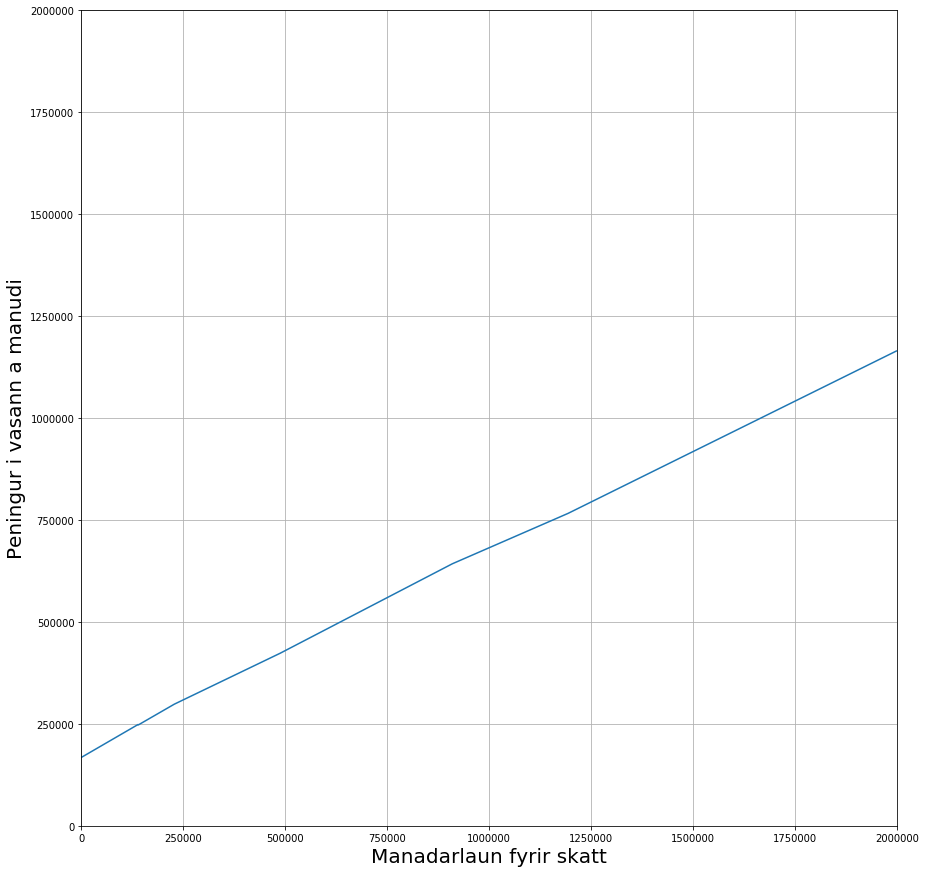

In [68]:
fig, ax = plt.subplots()
im = ax.imshow(data, interpolation='none')
ax.format_coord = Formatter(im)
plt.plot(tekjulisti, vasapjenlisti)
plt.grid(True)
plt.xlabel('Manadarlaun fyrir skatt', size=20)
plt.ylabel('Peningur i vasann a manudi', size=20)
plt.xlim(0,2000000)
plt.ylim(0,2000000)
plt.show()

## Bar graph with update

In [12]:
HTML('<script src="lib/d3/d3.min.js"></script>')

#### Graph Config 

In [13]:
html_template = Template('''
<style> $css_text </style>
<div id="graph-div"></div>
<script> $js_text </script>
''')

In [14]:
css_text = '''

.bar {
  fill: steelblue;
}

.bar:hover {
  fill: brown;
}

.axis {
  font: 10px sans-serif;
}

.axis path,
.axis line {
  fill: none;
  stroke: #000;
  shape-rendering: crispEdges;
}

.x.axis path {
  display: none;
}

'''

In [15]:
js_text_template = Template('''

var margin = {top: 20, right: 20, bottom: 30, left: 40},
    width = 500 - margin.left - margin.right,
    height = 300 - margin.top - margin.bottom;

var x = d3.scale.ordinal()
    .rangeRoundBands([0, width], .1);

var y = d3.scale.linear()
    .range([height, 0]);

var xAxis = d3.svg.axis()
    .scale(x)
    .orient("bottom");

var yAxis = d3.svg.axis()
    .scale(y)
    .orient("left");

var svg = d3.select("#graph-div").append("svg")
    .attr("width", width + margin.left + margin.right)
    .attr("height", height + margin.top + margin.bottom)
  .append("g")
    .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

var data = $data ;

  x.domain(data.map(function(d) { return d.letter; }));
  y.domain([0, d3.max(data, function(d) { return d.y; })]);

  svg.append("g")
      .attr("class", "x axis")
      .attr("transform", "translate(0," + height + ")")
      .call(xAxis);

  svg.append("g")
      .attr("class", "y axis")
      .call(yAxis);

  svg.selectAll(".bar")
      .data(data)
    .enter().append("rect")
      .attr("class", "bar")
      .attr("x", function(d) { return x(d.letter); })
      .attr("width", x.rangeBand())
      .attr("y", function(d) { return y(d.y); })
      .attr("height", function(d) { return height - y(d.y); });

''')

In [16]:
js_text_template_2 = Template('''

var bars = svg.selectAll(".bar").data($data);
  
bars
  .transition()
    .attr("y", function(d) { return y(d.y); })
    .attr("height", function(d) { return height - y(d.y); });

''')

#### Initial Data, Graph and Update 

In [77]:
# loading data
pickle_in = open("einstaed_3born.pickle","rb")
example_dict = pickle.load(pickle_in)

In [78]:
data = pd.DataFrame({'letter': ['Laun e skatt','Húsnæðisstuðningur','Barnabætur','Ráðstöfunartekjur'], 'y':\
                     [example_dict[0]['tekjur_e_skatt'],\
                      example_dict[0]['husnaedisstudningur'],\
                      example_dict[0]['barnabaetur'],\
                      example_dict[0]['pjeng_i_vasa']]})
data.head()

,letter,y
0,Laun e skatt,255960.200000
1,Húsnæðisstuðningur,41666.000000
2,Barnabætur,82449.333333
3,Ráðstöfunartekjur,378675.533333


In [79]:
js_text = js_text_template.substitute({'data': json.dumps(data.to_dict(orient='records'))})
HTML(html_template.substitute({'css_text': css_text, 'js_text': js_text}))

In [80]:
# change 'tekjur' parameter and run to update graph
example_dict[1]['tekjur'][0] = 400000
new_results = vasapeningur(example_dict[1])

data['y'] = [new_results['tekjur_e_skatt'],\
             new_results['husnaedisstudningur'],\
             new_results['barnabaetur'],\
            new_results['pjeng_i_vasa']]
js_text = js_text_template_2.substitute({'data': json.dumps(data.to_dict(orient='records'))})
HTML('<script>' + js_text + '</script>')